#Classification predict Climate Change


In [16]:
# utilities
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set()

# nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import nltk
import re

# sklearn(classifier)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [4]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\USER\anaconda3_\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-wb_n0kpg\\wordcloud_91b8cde5f3a94a4d98dc76ddc1ca2f9c\\setup.py'"'"'; __file__='"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-wb_n0kpg\\wordcloud_91b8cde5f3a94a4d98dc76ddc1ca2f9c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\USER\AppData\Local\Temp\pip-wheel-3bi9wwk0'
       cwd: C:\Users\USER\AppData\Local\Temp\pip-install-wb_n0kpg\wordcloud_91b8cde5f3a94a4d98dc76ddc1ca2f9c\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  c

In [ ]:
nltk.download()

# 1. Uploading the dataset

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [39]:
train.shape

(15819, 4)

In [42]:
train.columns

Index(['sentiment', 'message', 'tweetid', 'Processed_message'], dtype='object')

In [44]:
test.head()

,message,Processed_message
tweetid,,
169760,Europe will now be looking to China to make su...,europe look china make sure alone fight climat...
35326,Combine this with the polling of staffers re c...,combine poll staffer climate change woman righ...
224985,"The scary, unimpeachable evidence that climate...",scary unimpeachable evidence climate change al...
476263,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,karoli morgfair osborneink dailykos \nputin ge...
872928,RT @FakeWillMoore: 'Female orgasms cause globa...,rt fakewillmoore female orgasm cause global wa...


In [41]:
test.shape

(10546, 2)

In [43]:
test.columns

Index(['message', 'Processed_message'], dtype='object')

#4. Exploratory Data Analysis

###4.1 The distribution of tweets messages over the classes

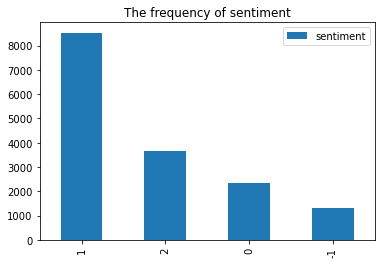

In [9]:
train['sentiment'].value_counts().plot(kind ='bar')
plt.title ('The frequency of sentiment')
plt.legend()
plt.show()

#5. Data Preprocessing

###5.1 Checking for nulls in he dataframes

In [10]:
# Checking Nulls in the train dataframe
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [11]:
# Checking Nulls in the test dataframe
test.isnull().sum()

message    0
tweetid    0
dtype: int64

###5.2 Checking for blanks in he dataframes

In [12]:
#Checking for blanks in the train dataframe
blanks = [] 
for i,sen,mes,twe in train.itertuples(): 
    if type(mes)==str:            
        if mes.isspace():        
            blanks.append(i)    
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [13]:
#Checking for blanks in the train dataframe
blanks = []  
for i,mes,twe in test.itertuples():  
    if type(mes)==str:            
        if mes.isspace():         
            blanks.append(i)    
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


###5.3 Replacing URL

In [14]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train['message'] = train['message'] .replace(to_replace = pattern_url, value = subs_url, regex = True)
test['message'] = test['message'] .replace(to_replace = pattern_url, value = subs_url, regex = True)

###5.4 Removing stopwords, lowering the words as well as lemmatizing  for both the train and the test dataframe

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub('<[^<]+?>','', text)
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

train['Processed_message'] = train.message.apply(lambda x: clean_text(x))

test['Processed_message'] = test.message.apply(lambda x: clean_text(x))


In [19]:
# Checking the preprossed train dataframe 
train.head()


,sentiment,message,tweetid,Processed_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warm
2,2,RT @RawStory: Researchers say we have three ye...,698562,rt rawstory researcher say three year act clim...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmaker wire 2016 wa pivotal year war cl...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,rt soynoviodetodas 2016 racist sexist climate ...


In [20]:
# Checking the preprossed test dataframe 
test.head()

,message,tweetid,Processed_message
0,Europe will now be looking to China to make su...,169760,europe look china make sure alone fight climat...
1,Combine this with the polling of staffers re c...,35326,combine poll staffer climate change woman righ...
2,"The scary, unimpeachable evidence that climate...",224985,scary unimpeachable evidence climate change al...
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,karoli morgfair osborneink dailykos \nputin ge...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,rt fakewillmoore female orgasm cause global wa...


#6. Defining variables

In [21]:
#Independent feature of the train dataframe
X=train['Processed_message']
#Dependent feature of the train dataframe
y=train['sentiment'] 
#Independent feature of test dataframe
x_unseen=test['Processed_message'] #test independent feature

In [38]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

#7. Splitting the dataset

In [22]:
#Splitting the train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#8. Model fitting


###8.3.1 Logistic Regression Model

In [23]:
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('LG',LogisticRegression()),
])
#Fitting the model with train dataset
text_clf.fit(X_train, y_train)  

C:\Users\USER\anaconda3_\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 2),
                                 stop_words='english')),
                ('LG', LogisticRegression())])

In [24]:
# Getting predicions from the X_test
predictions = text_clf.predict(X_test)
#Pritting the classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.80      0.35      0.49       126
           0       0.67      0.33      0.45       224
           1       0.76      0.88      0.82       895
           2       0.73      0.80      0.76       337

    accuracy                           0.75      1582
   macro avg       0.74      0.59      0.63      1582
weighted avg       0.74      0.75      0.73      1582

0.7458912768647282


###8.3.2 LinearSVC Model

In [25]:
text_clf1 = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('LS',LinearSVC()),
])
#Fitting the model with train dataset
text_clf1.fit(X_train, y_train)  

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 2),
                                 stop_words='english')),
                ('LS', LinearSVC())])

In [26]:
# Getting predicions from the X_test
predictions1 = text_clf1.predict(X_test)
#Printing the classification report
print(metrics.classification_report(y_test, predictions1))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions1))

              precision    recall  f1-score   support

          -1       0.70      0.50      0.58       126
           0       0.66      0.38      0.48       224
           1       0.79      0.87      0.83       895
           2       0.75      0.83      0.79       337

    accuracy                           0.76      1582
   macro avg       0.72      0.65      0.67      1582
weighted avg       0.75      0.76      0.75      1582

0.7629582806573957


###8.3.3 Support Vector Machine Model

In [27]:
text_clf2 = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('SV', SVC(kernel='rbf')),
])
#Fitting the model with train dataset
text_clf2.fit(X_train, y_train)  

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 2),
                                 stop_words='english')),
                ('SV', SVC())])

In [31]:
# Getting predictions from the X_test
predictions2 = text_clf2.predict(X_test)
#Pritting the classification report
print(metrics.classification_report(y_test,predictions2))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions2))

              precision    recall  f1-score   support

          -1       0.89      0.32      0.47       126
           0       0.79      0.29      0.43       224
           1       0.73      0.91      0.81       895
           2       0.76      0.78      0.77       337

    accuracy                           0.75      1582
   macro avg       0.79      0.58      0.62      1582
weighted avg       0.76      0.75      0.72      1582

0.7484197218710493


###8.3.4 Multinominal Naive Bayes Model

In [28]:
text_clf3 = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('MT', MultinomialNB()),
])
#Fitting the model with train dataset
text_clf3.fit(X_train, y_train)  

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 2),
                                 stop_words='english')),
                ('MT', MultinomialNB())])

In [29]:
# Getting predictions from the X_test
predictions3 = text_clf3.predict(X_test)
#Priting the classification report
print(metrics.classification_report(y_test,predictions3))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions3))

              precision    recall  f1-score   support

          -1       1.00      0.04      0.08       126
           0       1.00      0.03      0.06       224
           1       0.63      0.99      0.77       895
           2       0.92      0.45      0.60       337

    accuracy                           0.66      1582
   macro avg       0.89      0.38      0.38      1582
weighted avg       0.77      0.66      0.58      1582

0.661188369152971


#10. Predicting the sentiment from the test dataset based on the best model

In [30]:
#Getting the predicted sentimet from test dataset
y_pred = text_clf1.predict(x_unseen)

In [31]:
#Printing the predicted sentiment
y_pred

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

#11. Submissions

In [32]:
#Making the tweetid to be the idex
test=test.set_index('tweetid')

In [33]:
test.head(5)

,message,Processed_message
tweetid,,
169760,Europe will now be looking to China to make su...,europe look china make sure alone fight climat...
35326,Combine this with the polling of staffers re c...,combine poll staffer climate change woman righ...
224985,"The scary, unimpeachable evidence that climate...",scary unimpeachable evidence climate change al...
476263,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,karoli morgfair osborneink dailykos \nputin ge...
872928,RT @FakeWillMoore: 'Female orgasms cause globa...,rt fakewillmoore female orgasm cause global wa...


In [34]:
#Sellecting the index of the test dataframe
final_test= test.index

In [35]:
#Creating the submission Dataframe
Final_Table = {'tweetid': final_test, 'sentiment':np.round(y_pred, 0)}
submission = pd.DataFrame(data=Final_Table)
submission = submission[['tweetid', 'sentiment']]

In [36]:
submission.set_index('tweetid').head(5)

,sentiment
tweetid,
169760,1
35326,1
224985,1
476263,1
872928,0


In [37]:
submission.to_csv("TestSubmission1.csv",index  = False) #wrting csv file